# Round 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from array import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [2]:
#1 
file.shape

(10910, 26)

In [3]:
file.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [4]:
file

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
#2 


In [6]:
#3
file._get_numeric_data()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [7]:
file.select_dtypes(['object'])
# Allthough customer is an object, it's not a category

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [8]:
 file.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [9]:
#5

stats.mode(file['State'])


'California'

In [10]:
file['State'] = file['State'].fillna(stats.mode(file['State']))
file['Response'] = file['Response'].fillna(stats.mode(file['Response']))
file['Vehicle Class'] = file['Vehicle Class'].fillna(stats.mode(file['Vehicle Class']))
file['Vehicle Size'] = file['Vehicle Size'].fillna(stats.mode(file['Vehicle Size']))

In [11]:
# file.isna().sum()

In [12]:
np.mean(file['Months Since Last Claim'])

15.149070740488469

In [13]:
#The mean is propably more representative
np.median(file['Months Since Last Claim'])

nan

In [14]:
file['Months Since Last Claim'] = file['Months Since Last Claim'].fillna(np.mean(file['Months Since Last Claim']))

In [15]:
# file.isna().sum()

In [16]:
file['Number of Open Complaints'].median()

0.0

In [17]:
file['Number of Open Complaints'].mean()

0.38425610586747105

In [18]:
# the majority of the values are zero therefore we add the median which is zero
file['Number of Open Complaints'] = file['Number of Open Complaints'].fillna(np.mean(file['Number of Open Complaints']))


In [19]:
file.isna().sum()

Unnamed: 0                          0
Customer                            0
State                               0
Customer Lifetime Value             0
Response                            0
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
Vehicle Type                     5482
dtype: int64

In [20]:

# half of them have no values, the others are Type A so we categorized the missing ones as unknown
file['Vehicle Type'] = file['Vehicle Type'].fillna('Unknown')




In [21]:
file['Effective To Date'] = pd.to_datetime(file['Effective To Date'], errors='coerce')

In [22]:
file['Month'] = pd.DatetimeIndex(file['Effective To Date']).month
file

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [23]:
file[(file['Month'].isin(['1','2']))]

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month


In [45]:
#Bonus
#Standardize Table
def standTable(table):  
    table = table.drop(['Unnamed: 0'], axis=1, inplace = True)


#fill NA
def fillna(col, method):
    if method == 'mean':
        file[col] = file[col].fillna(np.mean(file[col]))
    elif method== 'med':
        file[col] = file[col].fillna(np.med(file[col]))
    elif method == 'mod':
        file[col] = file[col].fillna(stats.mode(file[col]))    
    else:
        print('Method not defined')
            
# change Type to Datetime
def colToDatetime(table, col):
    table[col] = pd.to_datetime(table[col], errors='coerce')

In [25]:
# e.g.
# standTable(file)
fillna('Number of Open Complaints', 'mean')
fillna('Response', 'mod')
colToDatetime(file, 'Effective To Date')

# Round 3

In [26]:
file.dtypes

Unnamed: 0                                int64
Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                 float64
Months Since Policy Inception             int64
Number of Open Complaints               float64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                        

In [27]:
file.shape

(10910, 27)

In [28]:
file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1


In [29]:

summary = file.describe().T
summary['iqr'] = summary['75%']-summary['25%'] # adds Interquartile Range
summary['range'] = summary['max'] - summary['min'] # adds range
for col in summary.columns: # rounds all values in summary
    summary[col] = summary[col].apply(lambda x : round(x, 2))

In [30]:
summary

,count,mean,std,min,25%,50%,75%,max,iqr,range
Unnamed: 0,10910.0,5454.50,3149.59,0.00,2727.25,5454.50,8181.75,10909.00,5454.50,10909.00
Customer Lifetime Value,10910.0,8018.24,6885.08,1898.01,4014.45,5771.15,8992.78,83325.38,4978.33,81427.37
Income,10910.0,37536.28,30359.20,0.00,0.00,33813.50,62250.75,99981.00,62250.75,99981.00
Monthly Premium Auto,10910.0,93.20,34.44,61.00,68.00,83.00,109.00,298.00,41.00,237.00
Months Since Last Claim,10910.0,15.15,9.78,0.00,7.00,15.00,23.00,35.00,16.00,35.00
Months Since Policy Inception,10910.0,48.09,27.94,0.00,24.00,48.00,71.00,99.00,47.00,99.00
Number of Open Complaints,10910.0,0.38,0.89,0.00,0.00,0.00,0.38,5.00,0.38,5.00
Number of Policies,10910.0,2.98,2.40,1.00,1.00,2.00,4.00,9.00,3.00,8.00
Total Claim Amount,10910.0,434.89,292.18,0.10,271.08,382.56,547.20,2893.24,276.12,2893.14
Month,10910.0,1.47,0.50,1.00,1.00,1.00,2.00,2.00,1.00,1.00


In [31]:
file.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Response', ylabel='count'>

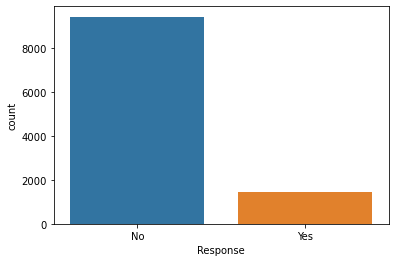

In [32]:
#Show a plot of the total number of responses.

# via barplot
#data = {'Response':['Yes', 'No'], 'Amount':[display(file[(file['Response']=='Yes')].shape[0]),display(file[(file['Response']=='No')].shape[0])]}
# sns.barplot(x='Response', y="Amount", data=data)
    
# via countplot
sns.countplot(x='Response',data=file)


[Text(0.5, 0, 'Response Rate'), Text(0, 0.5, 'Sales Channel')]

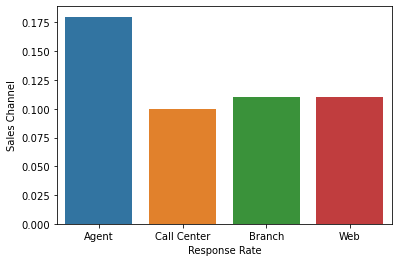

In [66]:
# Show a plot of the response rate by the sales channel.
amount = []
for value in file['Sales Channel'].unique():
    amount.append(round(file[(file['Sales Channel']==value) & (file['Response']=='Yes')].shape[0] / file[file['Sales Channel']==value].shape[0],2))   
    
    

data = {'Response': file['Sales Channel'].unique().tolist(), 'Amount':amount}
rr = sns.barplot(x='Response', y="Amount", data=data)
rr.set(xlabel="Response Rate", ylabel="Sales Channel")

[(0.0, 1.0)]

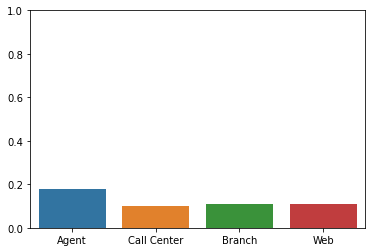

In [68]:
# same plot but y goes up to 100%
rr = sns.barplot(x='Response', y="Amount", data=data)
rr.set(ylim= (0, 1))   

In [35]:
# Show a plot of the response rate by Total Claim Amount

In [36]:
file['Total Claim Amount'].describe()

count    10910.000000
mean       434.888330
std        292.180556
min          0.099007
25%        271.082527
50%        382.564630
75%        547.200000
max       2893.239678
Name: Total Claim Amount, dtype: float64

In [70]:
# I guess their is a more elegant way to do it but I didnt find it. :D
step = 200
amount = []
tca_steps = []
for value in range(0, file['Total Claim Amount'].astype(int).max()+step, step):
    tca_steps.append(str(value) + '-' + str(value+step))
    if (file[(file['Total Claim Amount']>=value) &(file['Total Claim Amount']<value+step) &  (file['Response']=='Yes')].shape[0]) == 0:
        amount.append(0)
    else:
        amount.append(file[(file['Total Claim Amount']<value+step) & (file['Total Claim Amount'] >=value) ].shape[0] / (file[(file['Total Claim Amount']>=value) &(file['Total Claim Amount']<value+step) &  (file['Response']=='Yes')].shape[0]))

[Text(0.5, 0, 'Total Claim Amount'), Text(0, 0.5, 'Response Rate')]

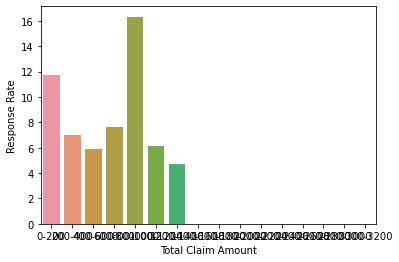

In [71]:


data = {'Response': tca_steps, 'Amount':amount}
rr = sns.barplot(x='Response', y="Amount", data=data)
rr.set(xlabel="Total Claim Amount", ylabel="Response Rate")


In [39]:
# Show a plot of the response rate by Income
file['Income'].describe()

count    10910.000000
mean     37536.284785
std      30359.195670
min          0.000000
25%          0.000000
50%      33813.500000
75%      62250.750000
max      99981.000000
Name: Income, dtype: float64

In [57]:
step = 10000
amount = []
tca_steps = []
for value in range(0, file['Income'].astype(int).max()+step, step):
    tca_steps.append(str(value) + '-' + str(value+step))
    if (file[(file['Income']>=value) &(file['Income']<value+step) &  (file['Response']=='Yes')].shape[0]) == 0:
        amount.append(0)
    else:
        amount.append(file[(file['Income']<value+step) & (file['Income'] >=value) ].shape[0] / (file[(file['Income']>=value) &(file['Income']<value+step) &  (file['Response']=='Yes')].shape[0]))

[Text(0.5, 0, 'Income'), Text(0, 0.5, 'Response Rate')]

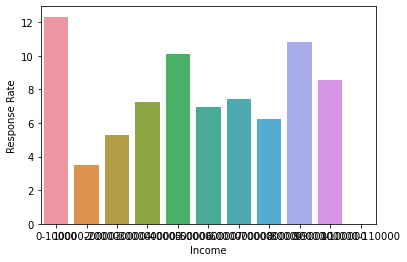

In [58]:

data = {'Response': tca_steps, 'Amount':amount}
rr = sns.barplot(x='Response', y="Amount", data=data)
rr.set(xlabel="Income", ylabel="Response Rate")
